### Libraries

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import statsmodels.api as sm

plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

warnings.filterwarnings('ignore')

### Data Gathering

In [3]:
station = pd.read_csv("./data/station_data.csv")
trip = pd.read_csv("./data/trip_data.csv" ,parse_dates=["Start Date","End Date"])
weather = pd.read_csv("./data/weather_data.csv")

In [4]:
station.tail(n=5)

,Id,Name,Lat,Long,Dock Count,City
71,77,Market at Sansome,37.789625,-122.400811,27,San Francisco
72,80,Santa Clara County Civic Center,37.352601,-121.905733,15,San Jose
73,82,Broadway St at Battery St,37.798541,-122.400862,15,San Francisco
74,83,Mezes Park,37.491269,-122.236234,15,Redwood City
75,84,Ryland Park,37.342725,-121.895617,15,San Jose


In [5]:
station.columns = ["Start Station","Name","Lat","Long","Dock Count","City"]

### Data Prepration

In [6]:
result = pd.merge(station,trip, on=['Start Station'], how='inner', suffixes=['_and', '_or'])

In [7]:
print("Station Data Shape :: ",station.shape)
print("Trip Data Shape :: ",trip.shape)
print("Resultant Data shape :: ",result.shape)

Station Data Shape ::  (76, 6)
Trip Data Shape ::  (354152, 6)
Resultant Data shape ::  (354152, 11)


In [8]:
result.sample(n=5)

,Start Station,Name,Lat,Long,Dock Count,City,Trip ID,Start Date,End Date,End Station,Subscriber Type
111522,55,Temporary Transbay Terminal (Howard at Beale),37.789756,-122.394643,23,San Francisco,782452,2015-05-27 09:06:00,2015-05-27 09:17:00,67,Subscriber
58399,48,Embarcadero at Vallejo,37.799953,-122.398525,15,San Francisco,570200,2014-08-12 17:09:00,2014-08-12 17:20:00,64,Subscriber
312853,74,Steuart at Market,37.794139,-122.394434,23,San Francisco,601419,2015-01-13 07:59:00,2015-01-13 08:05:00,60,Subscriber
273152,70,San Francisco Caltrain (Townsend at 4th),37.776617,-122.395260,19,San Francisco,572070,2014-09-12 17:48:00,2014-09-12 18:04:00,60,Subscriber
58483,48,Embarcadero at Vallejo,37.799953,-122.398525,15,San Francisco,562655,2014-01-12 17:17:00,2014-01-12 17:28:00,69,Subscriber


In [8]:
result.dtypes

Start Station               int64
Name                       object
Lat                       float64
Long                      float64
Dock Count                  int64
City                       object
Trip ID                     int64
Start Date         datetime64[ns]
End Date           datetime64[ns]
End Station                 int64
Subscriber Type            object
dtype: object

### Exploratory Data Anlaysis

In [9]:
temp_df = result[["Start Station","End Station","Start Date"]]

In [10]:
temp_df.sample(n=10)

,Start Station,End Station,Start Date
121735,55,50,2014-02-09 09:47:00
298313,73,56,2015-04-16 08:24:00
168384,61,55,2014-11-11 17:51:00
119038,55,59,2014-04-11 18:48:00
38774,42,51,2015-01-04 16:32:00
105425,54,74,2014-09-12 17:26:00
31533,41,50,2015-07-08 18:01:00
217247,67,74,2015-07-07 18:03:00
279572,70,55,2014-09-17 19:26:00
338953,77,61,2015-05-03 09:18:00


In [11]:
temp_df_grouped = temp_df.groupby(by=['Start Date','Start Station'],as_index=False)['End Station'].sum()
temp_df_grouped = temp_df_grouped.rename(columns={'End Station':'Total_Bookings'})
temp_df_grouped.sort_values('Start Date')
temp_df_grouped.head(n=10)

,Start Date,Start Station,Total_Bookings
0,2014-01-09 00:05:00,66,171
1,2014-01-09 03:16:00,50,70
2,2014-01-09 04:21:00,39,65
3,2014-01-09 04:59:00,66,72
4,2014-01-09 05:54:00,68,74
5,2014-01-09 06:58:00,67,77
6,2014-01-09 07:03:00,9,9
7,2014-01-09 07:32:00,54,51
8,2014-01-09 07:37:00,27,54
9,2014-01-09 08:11:00,51,50


In [12]:
df = temp_df_grouped.set_index("Start Date")

In [13]:
y = df['Total_Bookings'].resample('MS').mean()

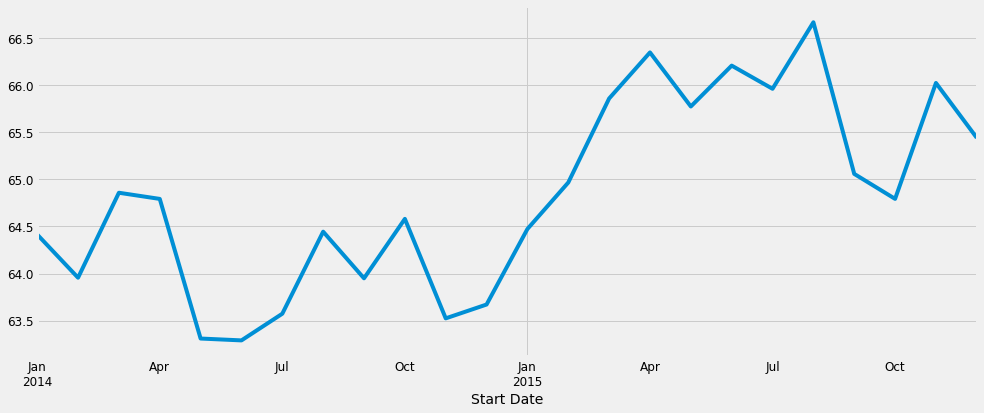

In [19]:
y.plot(figsize=(15, 6))
plt.show()

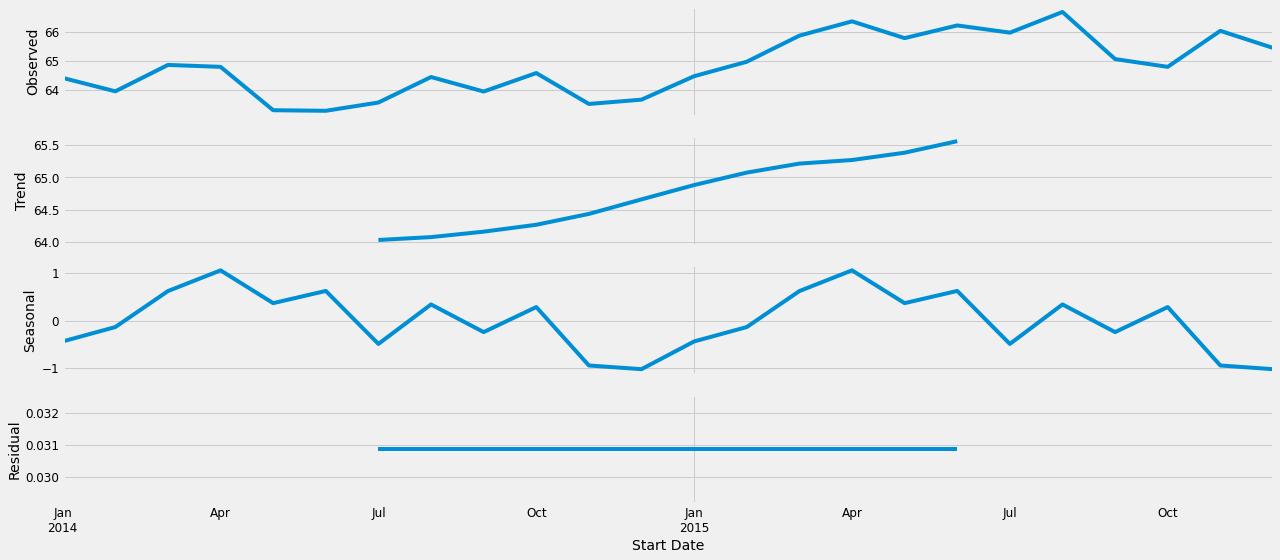

In [20]:
## Decompose data into three distinct components: trend, seasonality, and noise
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [21]:
# ARIMA models are denoted with the notation ARIMA(p, d, q).
# where -:
# p : seasonality
# d : trend
# q : noise
#Let's generate few p,d,q

In [23]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Parameter combinations for Seasonal ARIMA ::')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Parameter combinations for Seasonal ARIMA ::
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


## Autoregressive Integrated Moving Average.

In [25]:
# To get the optimal set of parameters that yields the best performance for our model.

In [26]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:259.1921449570718
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:47.531047845601776
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:35.63209818663506
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:223.6067148433822
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:36.292178761574924
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:37.818562433236885
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:53.160362137325365
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:29.839769352619612
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:29.677676117917418
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:51.16040960730508
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:29.57355439085071
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:30.7965941283883
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:56.76485265753681
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:34.20319597205601
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:30.695682526737098
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:55.52525134380237
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:33.28166217672486
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:32.694734398712406
ARI

**SARIMAX(1, 1, 1)x(1, 0, 0, 12) has the lowest AIC: So can be considered for the parameters**

## Model Training

In [40]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 0, 0, 12),
                                enforce_stationarity=True,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4568      0.528      0.865      0.387      -0.578       1.492
ma.L1         -0.7235      0.396     -1.826      0.068      -1.500       0.053
ar.S.L12       0.1301      0.370      0.351      0.725      -0.596       0.856
sigma2         0.5174      0.246      2.101      0.036       0.035       1.000


## Validation

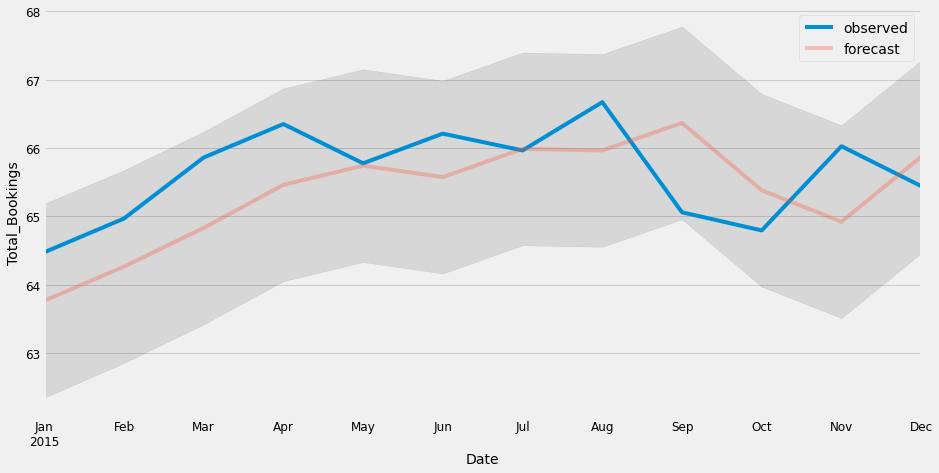

In [47]:
pred = results.get_prediction(start=pd.to_datetime('2015-01-01'), dynamic=False)


pred_ci = pred.conf_int()
ax = y['2015':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='forecast', alpha=.3, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.1)
ax.set_xlabel('Date')
ax.set_ylabel('Total_Bookings')
plt.legend()
plt.show()

In [45]:
y_forecasted = pred.predicted_mean
y_truth = y['2015-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.6


In [46]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 0.78


## Forecasts

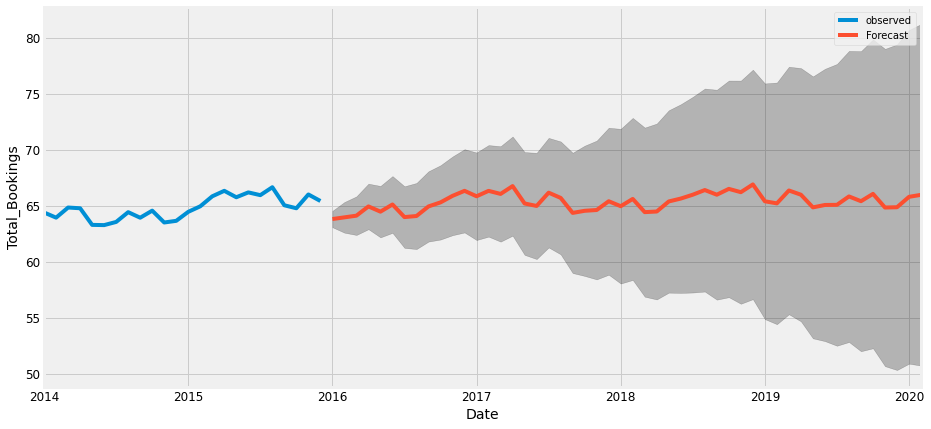

In [23]:
pred_uc = results.get_forecast(steps=50)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Total_Bookings')
plt.legend()
plt.show()